IMPORTING LIBRARIES

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns   #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
sns.set(color_codes=True)

IMPORTING AND DISPLAYING OF DATA

In [3]:
#importing test datasets
test = pd.read_csv('~/Downloads/R PREDICT 3rd edit/test_set.csv')
#To display the top 5 rows
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [4]:
#importing train datasets
train= pd.read_csv('~/Downloads/R PREDICT 3rd edit/train_set.csv')
#To display the top 5 rows
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


BASIC DATA ANALYSIS

In [5]:
#confirming the data shapes for both the train and test
train.shape , test.shape

((64376, 13), (685, 13))

The shape command shows us that we have :
- 64376 rows of data and 13 features for the train dataset.
- 685 rows and 13 features for the test dataset.


Checking for nulls in the datasets

In [17]:
print(train.isnull().sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64


In [18]:
print(test.isnull().sum())

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64


This confirms that there are no nulls in both the test and train datasets.

Checking DataTypes

In [6]:
train.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

In [19]:
test.dtypes

Index               int64
Province           object
Container          object
Size_Grade         object
Weight_Kg         float64
Commodities        object
Date               object
Low_Price         float64
High_Price        float64
Sales_Total       float64
Total_Qty_Sold      int64
Total_Kg_Sold     float64
Stock_On_Hand       int64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


Using the info() and dtypes()commands, we can confirm our categorical and numerical features. If a feature (variable) is categorical the Datatype is object and if it is a numerical variable the Datatype is an int64 or float64.

DESCRIPTIVE STATICTICS OF EACH FEATURE IN THE DATASETS

In [11]:
test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


In [10]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [20]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight_Kg               4.00
Low_Price              50.00
High_Price             65.00
Sales_Total         17618.00
Total_Qty_Sold        370.00
Total_Kg_Sold        3075.00
Stock_On_Hand         381.00
avg_price_per_kg        4.65
dtype: float64


In [21]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Index               342.0
Weight_Kg             9.3
Low_Price            78.0
High_Price           96.0
Sales_Total       19876.0
Total_Qty_Sold      187.0
Total_Kg_Sold      2829.0
Stock_On_Hand       496.0
dtype: float64


MEASURE OF OUTLIERS PRESENT IN THE DATA

In [9]:
train.kurtosis()

Weight_Kg           116.022033
Low_Price           123.977754
High_Price          109.763276
Sales_Total          89.378966
Total_Qty_Sold      152.646835
Total_Kg_Sold        83.222862
Stock_On_Hand       437.075702
avg_price_per_kg           NaN
dtype: float64

In [12]:
test.kurtosis()

Index             -1.200000
Weight_Kg         13.611804
Low_Price         20.126362
High_Price        17.610473
Sales_Total       19.626133
Total_Qty_Sold    19.531658
Total_Kg_Sold     24.423404
Stock_On_Hand     14.868371
dtype: float64

Indicates a lack of outliers for all features

OBTAINING HOW SYMMETRICAL THE DATASETS ARE

In [13]:
train.skew()

Weight_Kg           10.746241
Low_Price           10.071797
High_Price           9.519075
Sales_Total          7.372393
Total_Qty_Sold       9.448153
Total_Kg_Sold        7.171355
Stock_On_Hand       13.767932
avg_price_per_kg          NaN
dtype: float64

The skew values calculated are above 1 which indicates that the data has a High Postive Skew.

In [14]:
test.skew()

Index             0.000000
Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

The skew values calculated are above 1 which indicates that the data has a High Postive Skew except for Index which has a skew value of 0 which indicates that it has a Moderate Positive Skew.

In [15]:
# Rows containing duplicate data on train data
duplicate_rows_df = train[train.duplicated()]
print('duplicate rows: ', duplicate_rows_df.shape)

duplicate rows:  (0, 13)


In [16]:
# Rows containing duplicate data on test data
duplicate_rows_df = test[test.duplicated()]
print('duplicate rows: ', duplicate_rows_df.shape)

duplicate rows:  (0, 13)


DATA VISUALIZATION

Histogram And Density Plot

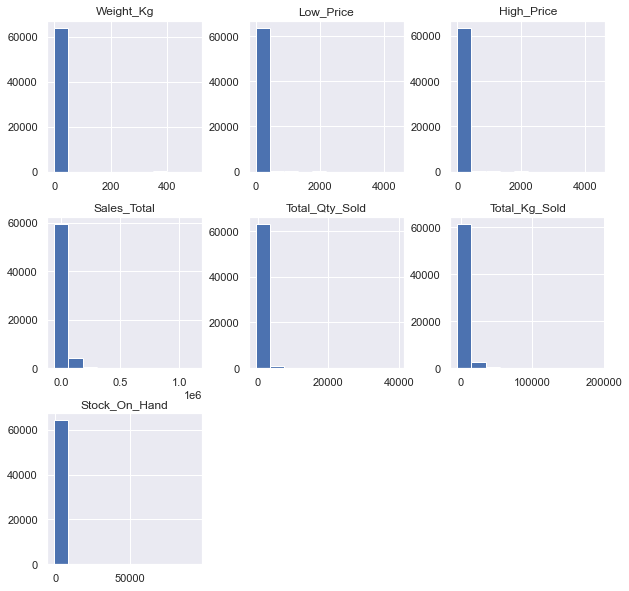

In [15]:
features = ['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']  
train[features].hist(figsize=(10,10));

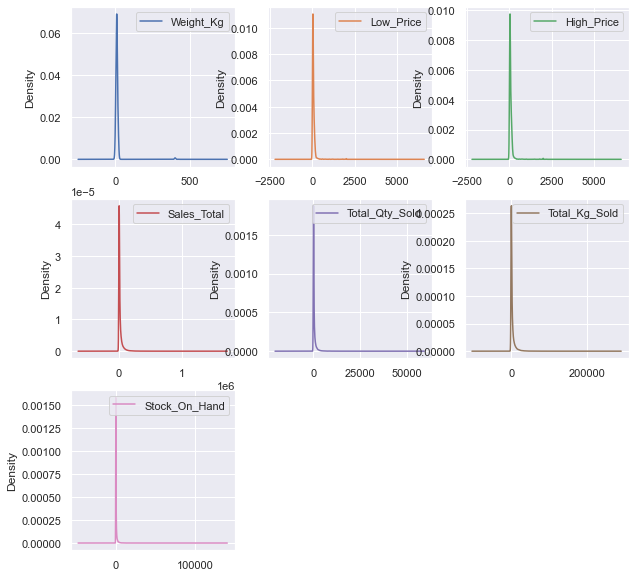

In [17]:
train[features].plot(kind='density',subplots=True, layout=(3,3), sharex=False, figsize=(10,10));

Correlation Coefficient Values

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.832214,0.846184,0.007710,-0.055573,0.032639,-0.039879,-0.054991
Low_Price,0.832214,1.000000,0.962504,-0.006438,-0.093333,-0.031281,-0.062260,0.124585
High_Price,0.846184,0.962504,1.000000,0.029433,-0.082580,-0.000889,-0.046742,0.123440
Sales_Total,0.007710,-0.006438,0.029433,1.000000,0.750116,0.920337,0.265030,-0.000303
Total_Qty_Sold,-0.055573,-0.093333,-0.082580,0.750116,1.000000,0.735714,0.347718,-0.037589
Total_Kg_Sold,0.032639,-0.031281,-0.000889,0.920337,0.735714,1.000000,0.236541,-0.077350
Stock_On_Hand,-0.039879,-0.062260,-0.046742,0.265030,0.347718,0.236541,1.000000,-0.025811
avg_price_per_kg,-0.054991,0.124585,0.123440,-0.000303,-0.037589,-0.077350,-0.025811,1.000000


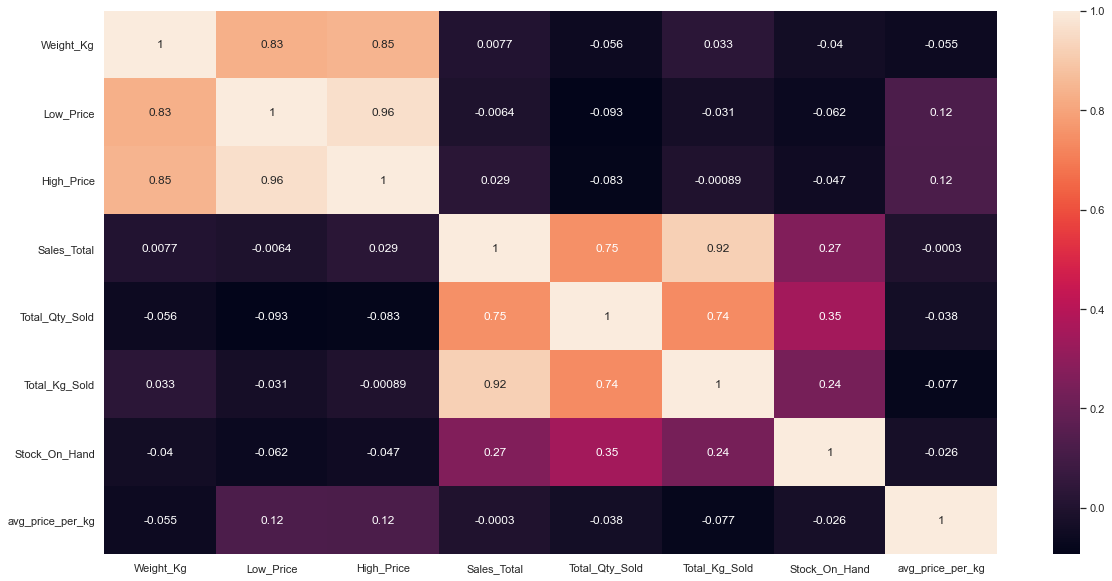

In [19]:
plt.figure(figsize=(20,10))
correlation= train.corr()
sns.heatmap(correlation,annot=True)
correlation

- Weight_kg and Low_Price =0.83 (Strong Positive Correlation)
- Weight_kg and High_Price=0.96(Strong Positive Correlation)
- Weight_kg and avg_price_per_kg=-0.055(Weak Negative Correlation)
- High_price and Sales_Total=0.029(Weak Positive Correlation)
- Low_Price and Sales_Total=-0.0064(Weak Negative Correlation)
- Total_kg_Sold and Sales_Total=0.92 (Strong Positive Correlation)

Scatter Plots

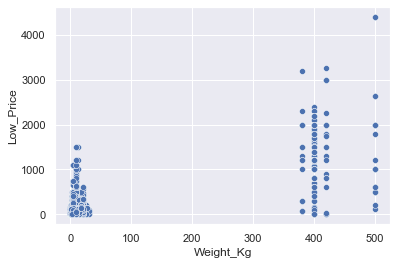

In [27]:
sns.scatterplot(x='Weight_Kg',y='Low_Price',data=train);

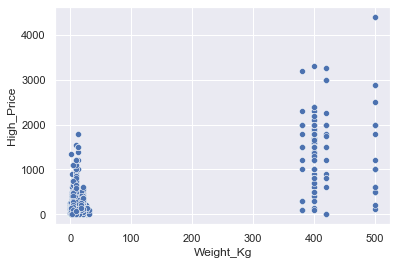

In [32]:
sns.scatterplot(x='Weight_Kg',y='High_Price',data=train);

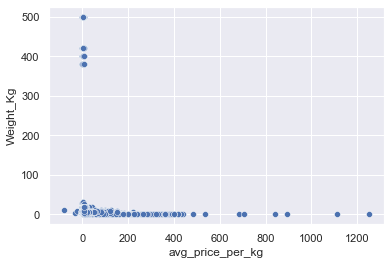

In [30]:
sns.scatterplot(x='avg_price_per_kg',y='Weight_Kg',data=train);

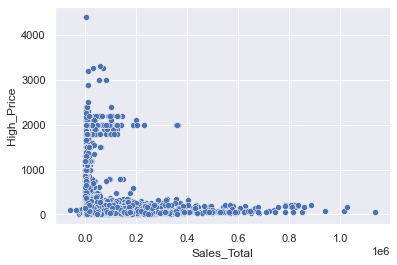

In [35]:
sns.scatterplot(y='High_Price',x='Sales_Total',data=train);

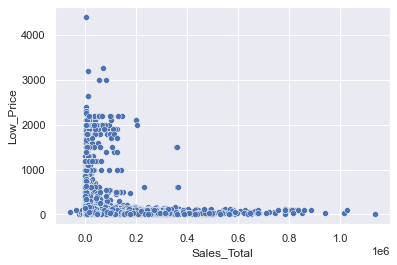

In [36]:
sns.scatterplot(y='Low_Price',x='Sales_Total',data=train);

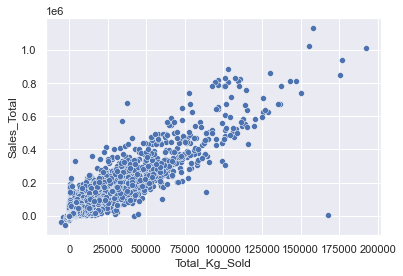

In [5]:
sns.scatterplot(x='Total_Kg_Sold',y='Sales_Total',data=train);

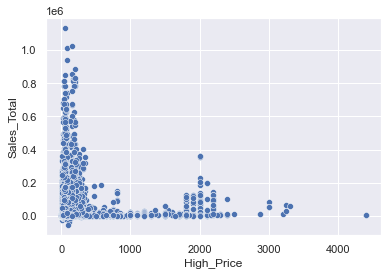

In [6]:
sns.scatterplot(x='High_Price',y='Sales_Total',data=train);

Joint Plots

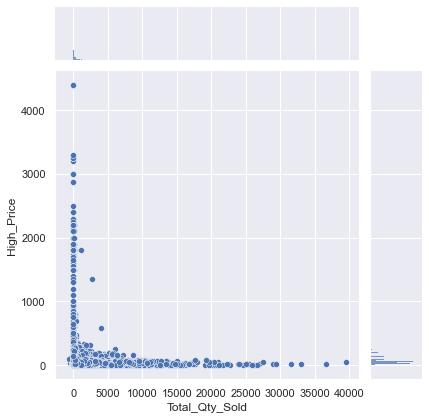

In [40]:
sns.jointplot(y = 'High_Price', x = 'Total_Qty_Sold', data = train);

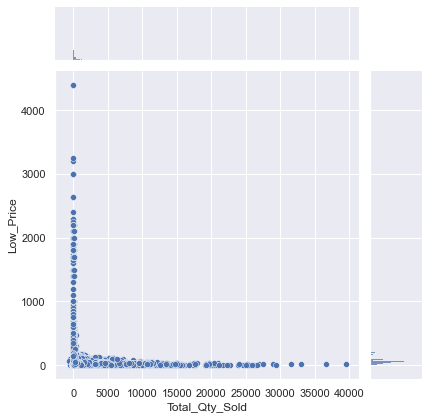

In [41]:
sns.jointplot(x = 'Total_Qty_Sold', y = 'Low_Price', data = train);

Box Plot and Violin Plot

<AxesSubplot:xlabel='High_Price'>

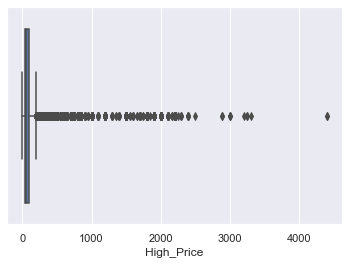

In [22]:
sns.boxplot(x=train['High_Price'])

<AxesSubplot:xlabel='Low_Price'>

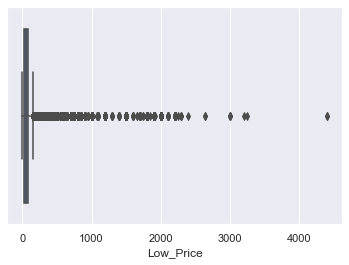

In [23]:
sns.boxplot(x=train['Low_Price'])

<AxesSubplot:xlabel='Sales_Total'>

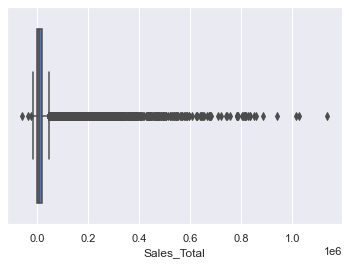

In [5]:
sns.boxplot(x=train['Sales_Total'])

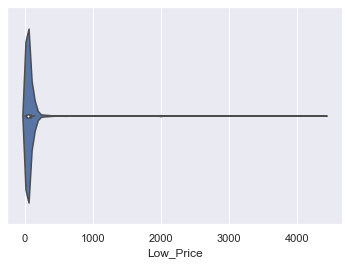

In [25]:
sns.violinplot(x='Low_Price', data=train);

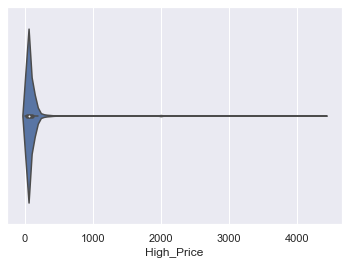

In [26]:
sns.violinplot(x='High_Price', data=train);

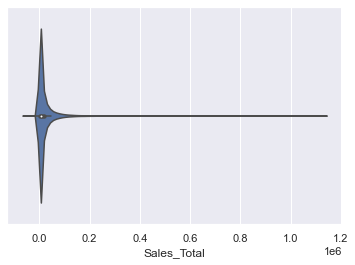

In [6]:
sns.violinplot(x='Sales_Total', data=train);

Bar Plot

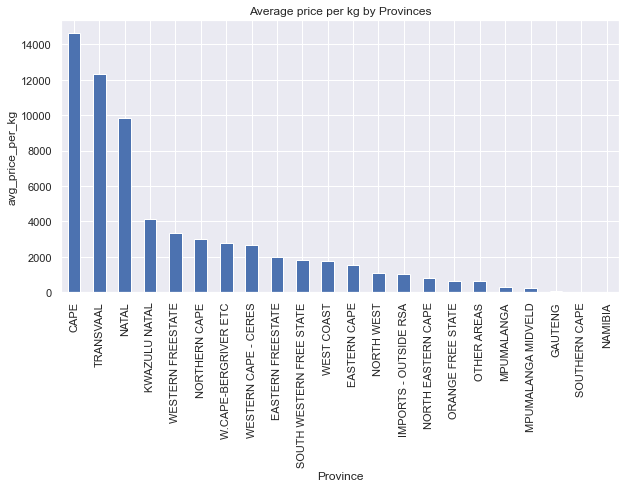

In [28]:
train.Province.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Average price per kg by Provinces')
plt.ylabel('avg_price_per_kg')
plt.xlabel('Province');

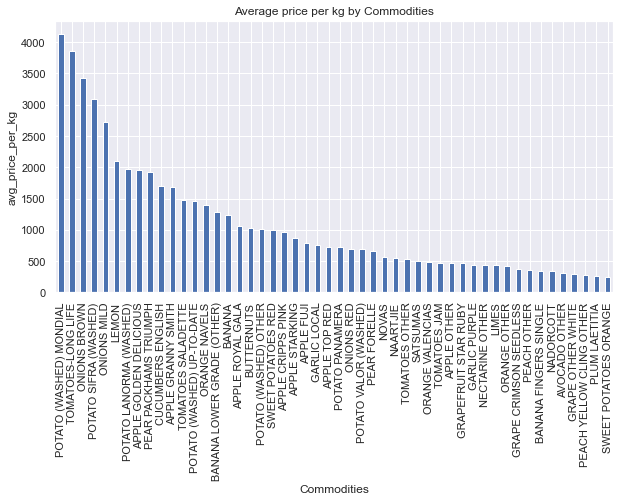

In [29]:
train.Commodities.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title('Average price per kg by Commodities')
plt.ylabel('avg_price_per_kg')
plt.xlabel('Commodities');